# KMeans: choosing clusters

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
penguins = sns.load_dataset('penguins').dropna()
penguins.sample(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
131,Adelie,Torgersen,43.1,19.2,197.0,3500.0,Male
200,Chinstrap,Dream,51.5,18.7,187.0,3250.0,Male
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,Female
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,Female
241,Gentoo,Biscoe,45.1,14.5,215.0,5000.0,Female


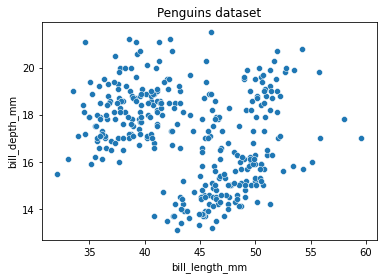

In [ ]:
penguins.dropna(inplace=True)
plt.title('Penguins dataset')
sns.scatterplot(data=penguins, x='bill_length_mm',	y='bill_depth_mm')
plt.show()

In [ ]:
columns = ['bill_length_mm', 'bill_depth_mm']

peng_sample = penguins.filter(columns)
peng_sample.head(3)

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
peng_norm = MinMaxScaler().fit_transform(peng_sample)
pd.DataFrame(peng_norm, columns=columns).head()

,bill_length_mm,bill_depth_mm
0,0.254545,0.666667
1,0.269091,0.511905
2,0.298182,0.583333
3,0.167273,0.738095
4,0.261818,0.892857


In [ ]:
from sklearn.cluster import KMeans
peng_kmeans = KMeans(n_clusters=3).fit(peng_norm)

peng_kmeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

## Ways to find the right number of clusters

### Visualise the relation between variables

In [ ]:
columns = ['bill_length_mm', 'bill_depth_mm']

centroids = pd.DataFrame(peng_kmeans.cluster_centers_)
centroids.columns = columns
centroids

,bill_length_mm,bill_depth_mm
0,0.243784,0.613578
1,0.549303,0.224802
2,0.646378,0.667033


In [ ]:
plot_data = pd.DataFrame(peng_norm)
plot_data.columns = columns
plot_data['cluster'] = peng_kmeans.labels_#peng_kmeans.predict(peng_norm)
plot_data.head()

,bill_length_mm,bill_depth_mm,cluster
0,0.254545,0.666667,0
1,0.269091,0.511905,0
2,0.298182,0.583333,0
3,0.167273,0.738095,0
4,0.261818,0.892857,0


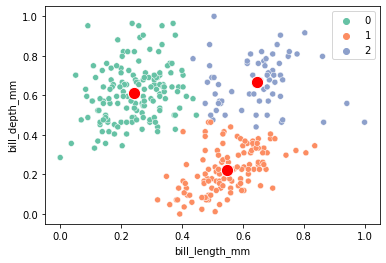

In [ ]:
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids, x='bill_length_mm', y='bill_depth_mm', color='red', s=150)
plt.show()

### Evaluate when checking the distance between centroids

In [ ]:
centroids

,bill_length_mm,bill_depth_mm
0,0.243784,0.613578
1,0.549303,0.224802
2,0.646378,0.667033


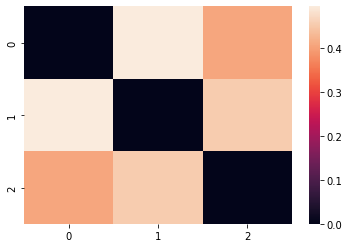

In [ ]:
def manhattan_distance(data, student, student_to_compare): 
    distance = (
        pd.DataFrame({
            'student_1':data.loc[student,:],
            'student_2':data.loc[student_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: abs(x.student_1 - x.student_2))
        .agg({'dist_abs':'sum'})[0]
    )
    return distance

def euclidean_distance(data, student, student_to_compare): 
    distance = (
        pd.DataFrame({
            'student_1':data.loc[student,:],
            'student_2':data.loc[student_to_compare,:]
        })
        # applying the formula
        .assign(dist_abs = lambda x: (x.student_1 - x.student_2)**2)
        .agg({'dist_abs':'sum'})[0]**0.5
    )
    return distance


def get_distances(data, distance_type='euclidean'):
    """
    Given a dataframe, return the distance between all the indexes. 
    We assume the indexes represents the users/students. 
    Args: 
        * dataset 
        * distance type to perform the operation (euclidean or manhattan)
    """
    if distance_type == 'manhattan': 
        distances = [[manhattan_distance(data, student, student_to_compare) for student in data.index] for student_to_compare in data.index]
    else: 
        distances = [[euclidean_distance(data, student, student_to_compare) for student in data.index] for student_to_compare in data.index]
        
    return pd.DataFrame(distances, columns=data.index, index=data.index)


sns.heatmap(get_distances(centroids))
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


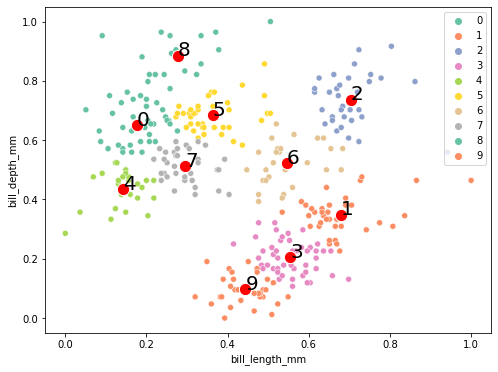

In [ ]:
temp_kmeans = KMeans(n_clusters=10).fit(peng_norm)

centroids_temp = pd.DataFrame(temp_kmeans.cluster_centers_)
centroids_temp.columns = columns
centroids_temp['cluster_name'] = centroids_temp.index

plot_data['cluster'] = temp_kmeans.labels_

fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(data=plot_data, x='bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
sns.scatterplot(data=centroids_temp, x='bill_length_mm', y='bill_depth_mm', color='red', s=150)
for i in range(centroids_temp.shape[0]):
    plt.text(
        x=centroids_temp['bill_length_mm'][i], 
        y=centroids_temp['bill_depth_mm'][i],
        s=centroids_temp['cluster_name'][i], 
        size=20
    )
plt.show()

dist_temp = get_distances(centroids_temp.drop('cluster_name', axis=1))

<AxesSubplot:>

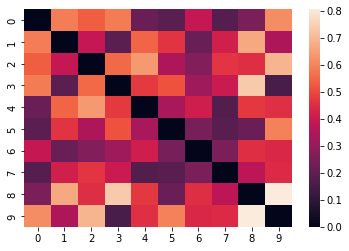

In [ ]:
sns.heatmap(dist_temp)

### Using inertia

In [ ]:
peng_kmeans.inertia_

8.769486294749548

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

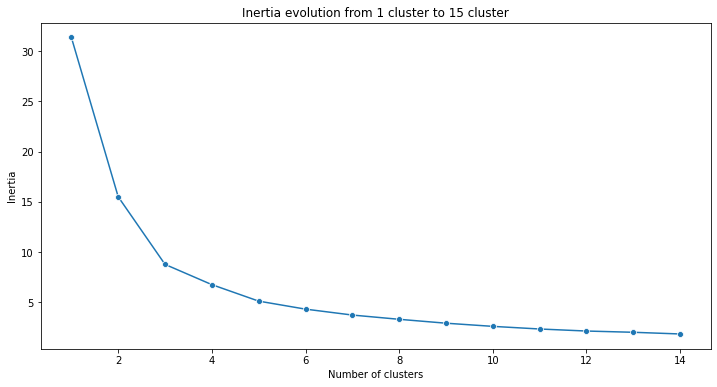

In [ ]:
max_k = 15
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(peng_norm).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Food ratings example

In [ ]:
sheet_id = '13n9SfqHIyzPHXzdPK0zqRE3gGfwkwe2vb9_ZjYYRpr8'
sheet_name = 'DS014'
url =  f'https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}'

food = (
  pd.read_csv(url, index_col='student')
    .drop(['age','favorite_color'], axis=1)
    .dropna()
    )
food

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky
student,,,,,,,,,
Crystal,7.0,3.0,8.0,10.0,2,5.0,8.0,3.0,6.0
Subin,6.0,0.0,6.0,2.0,8,5.0,6.0,6.0,8.0
Ana,9.0,7.0,6.0,9.0,0,8.0,5.0,1.0,8.0
Agata,10.0,5.0,5.0,7.0,8,7.0,10.0,10.0,4.0
Therese,10.0,10.0,0.0,0.0,8,10.0,10.0,10.0,8.0
Tanya,9.0,8.0,8.0,10.0,10,8.0,10.0,8.0,0.0
David,8.0,8.0,3.0,10.0,5,6.0,10.0,9.0,5.0
Bharati,10.0,8.0,0.0,0.0,0,8.0,9.0,3.0,4.0
Andreas,6.0,0.0,8.0,9.0,6,5.0,7.0,0.0,5.0


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

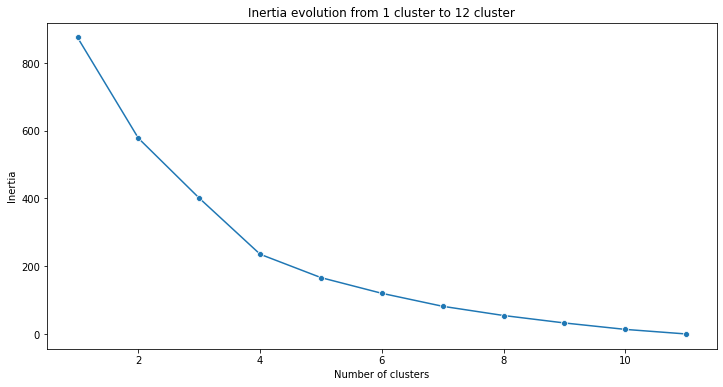

In [ ]:
max_k = 12
inertia = []

for k in range(1, max_k): 
    inertia.append(KMeans(n_clusters=k).fit(food).inertia_)

fig, ax = plt.subplots(figsize=(12, 6))
plt.title(f'Inertia evolution from 1 cluster to {max_k} cluster')
sns.lineplot(x=range(1, max_k), y=inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
ds014_food_kmeans = KMeans(n_clusters=4).fit(food)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
food['groups'] = ds014_food_kmeans.predict(food)

In [ ]:
food.sort_values(by='groups')[['groups']]

,groups
student,
Subin,0
Joan,0
Agata,1
Tanya,1
David,1
Crystal,2
Ana,2
Andreas,2
Yanish,2


In [ ]:
food.loc[['Therese','Bharati'],:]

,broccoli,brussels_sprouts,hamburger (meat),oysters (raw),onion (raw),peas,olives,blue_cheese,whisky,groups
student,,,,,,,,,,
Therese,10.0,10.0,0.0,0.0,8,10.0,10.0,10.0,8.0,3
Bharati,10.0,8.0,0.0,0.0,0,8.0,9.0,3.0,4.0,3


### Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_score(peng_norm, peng_kmeans.labels_)

0.5139272799995429

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

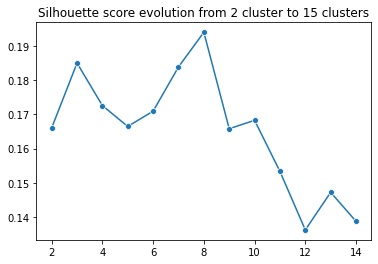

In [ ]:
max_k = 15
sil_score = []

food_norm = MinMaxScaler().fit_transform(food)

for k in range(2, max_k): 
    labels = KMeans(n_clusters=k).fit(food_norm).labels_
    sil_score.append(silhouette_score(food_norm, labels))

plt.title(f'Silhouette score evolution from 2 cluster to {max_k} clusters')
sns.lineplot(x=range(2, max_k), y=sil_score, marker='o')
plt.show()

The silhouette coefficient can vary between -1 and +1: 

|   |   |
|---|---|
|+1   | the instance is well inside its own cluster and far from other clusters.  |
|0   | the instance is close to a cluster boundary.   |
|-1   | the instance may have been assigned to the wrong cluster.  |

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 2 the average to silhouette is: 0.1636
	- For cluster = 0 the silhouette value is: 0.17
	- For cluster = 1 the silhouette value is: 0.16


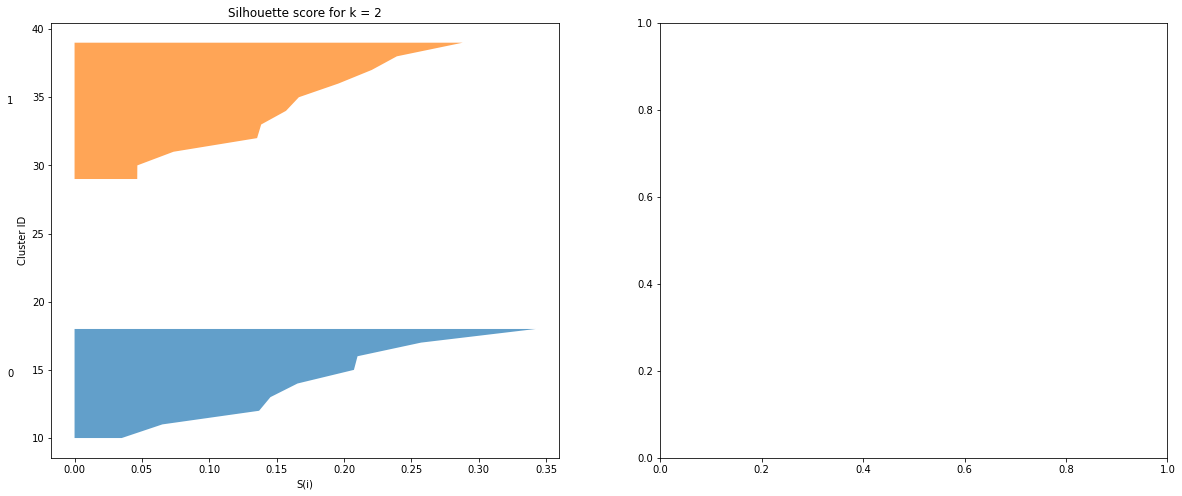

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 3 the average to silhouette is: 0.1849
	- For cluster = 0 the silhouette value is: 0.24
	- For cluster = 1 the silhouette value is: 0.26
	- For cluster = 2 the silhouette value is: 0.07


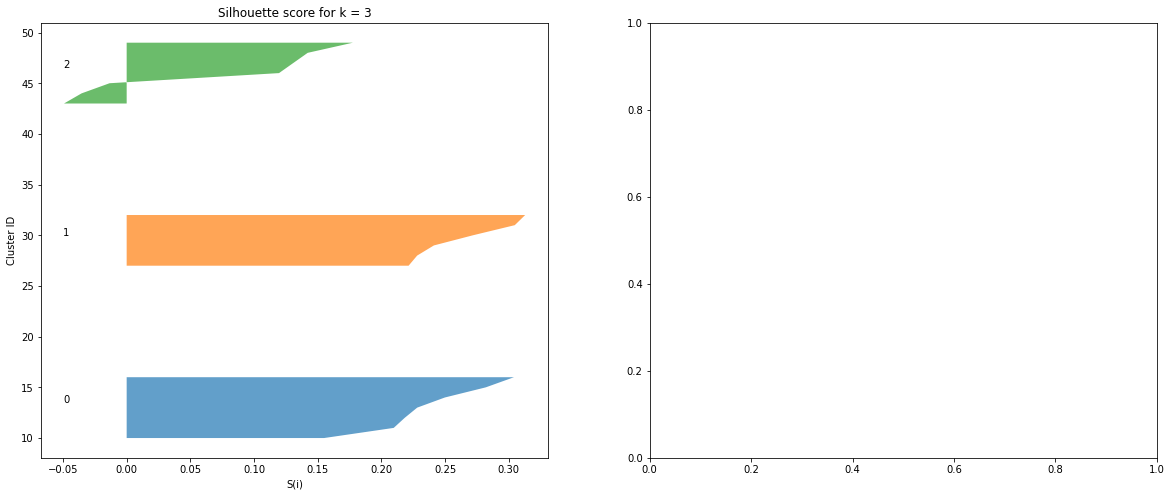

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 4 the average to silhouette is: 0.1824
	- For cluster = 0 the silhouette value is: 0.19
	- For cluster = 1 the silhouette value is: 0.21
	- For cluster = 2 the silhouette value is: 0.31
	- For cluster = 3 the silhouette value is: 0.09


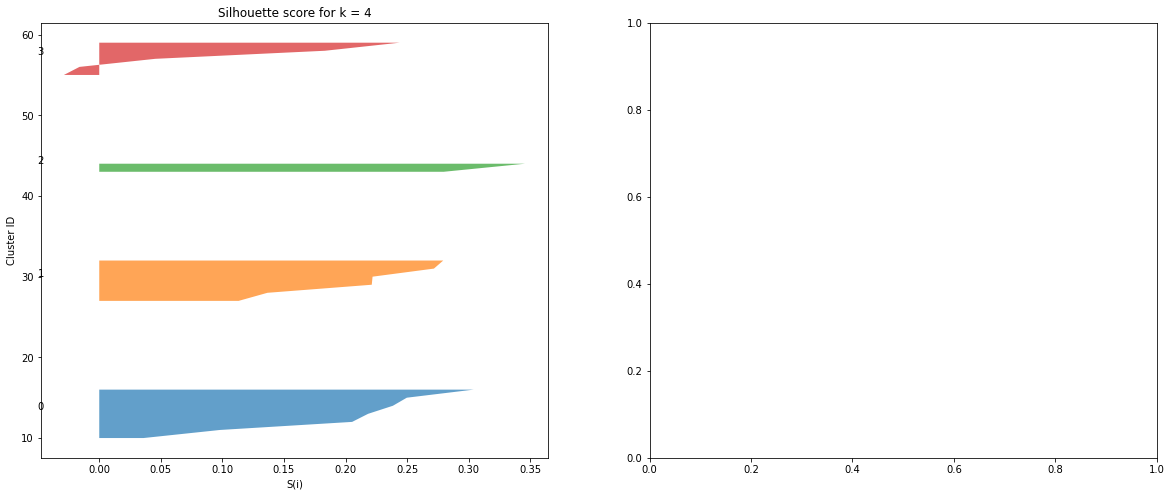

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 5 the average to silhouette is: 0.157
	- For cluster = 0 the silhouette value is: 0.08
	- For cluster = 1 the silhouette value is: 0.09
	- For cluster = 2 the silhouette value is: 0.2
	- For cluster = 3 the silhouette value is: 0.16
	- For cluster = 4 the silhouette value is: 0.22


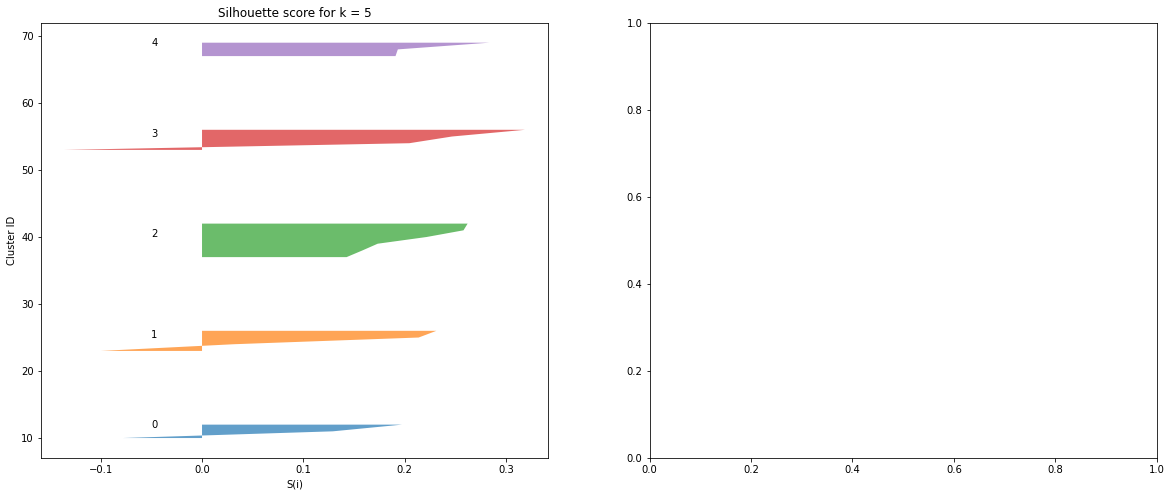

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 6 the average to silhouette is: 0.1727
	- For cluster = 0 the silhouette value is: 0.19
	- For cluster = 1 the silhouette value is: 0.25
	- For cluster = 2 the silhouette value is: 0.1
	- For cluster = 3 the silhouette value is: 0.16
	- For cluster = 4 the silhouette value is: 0.25
	- For cluster = 5 the silhouette value is: 0.15


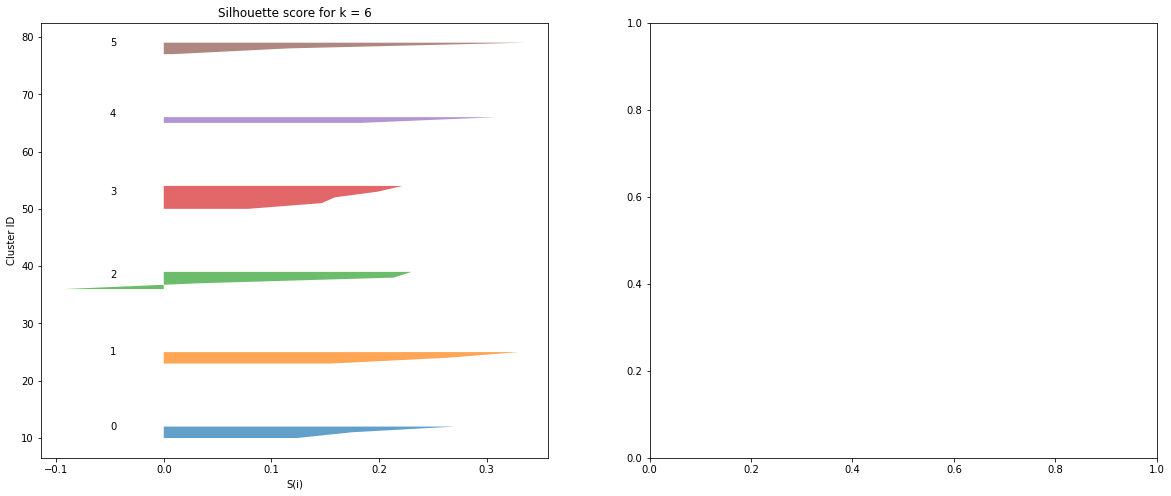

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


* For k = 7 the average to silhouette is: 0.1671
	- For cluster = 0 the silhouette value is: 0.22
	- For cluster = 1 the silhouette value is: 0.26
	- For cluster = 2 the silhouette value is: 0.05
	- For cluster = 3 the silhouette value is: 0.19
	- For cluster = 4 the silhouette value is: 0.24
	- For cluster = 5 the silhouette value is: 0.11
	- For cluster = 6 the silhouette value is: 0.17


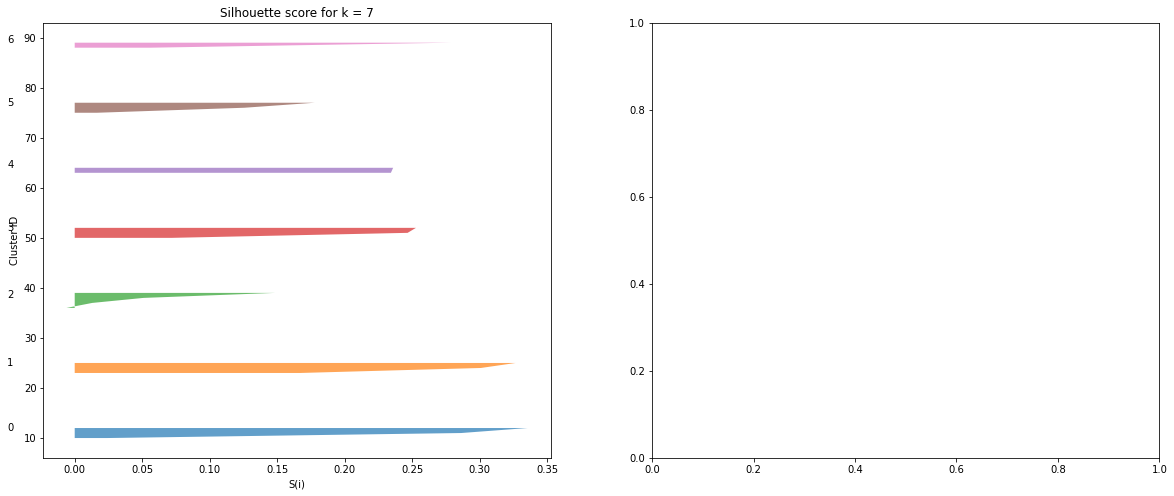

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

max_k = 8
data = food_norm

for k in range(1, max_k): 
    kmean_model = KMeans(n_clusters=k).fit(data)
    labels = kmean_model.labels_
    
    if 1 < k < data.shape[0]: 
        
        fig, (axis1, axis2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        sil_avg = silhouette_score(data, labels)
        print(f"* For k = {k} the average to silhouette is: {round(sil_avg,4)}")
        sample_sil_val = silhouette_samples(data, labels)
        
        y_lower = 10
        
        for i in range(k): 
            ith_cluster_sv = sample_sil_val[labels == i]
            print(f"\t- For cluster = {i} the silhouette value is: {round(np.mean(ith_cluster_sv),2)}")
            
            ith_cluster_sv.sort()
            
            # Calculate where to put the silhuette on the y axes
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
 
            
            # Paint the cluster
            axis1.fill_betweenx(np.arange(y_lower, y_upper),
                               0, ith_cluster_sv, 
                                alpha = 0.7)
            
            
            # Label the cluster
            axis1.text(-0.05, y_lower + 0.5 * ith_cluster_size, str(i))
            
            # Calculate the next y lower value for the next cluster of the graph
            y_lower = y_upper + 10 # we left 10 spaces without any observation
            
        axis1.set_title("Silhouette score for k = %s"%str(k))
        axis1.set_xlabel("S(i)")
        axis1.set_ylabel("Cluster ID")

    # if 1 < k: 
    #     centr_df_temp = pd.DataFrame(kmean_model.cluster_centers_)
    #     centr_df_temp.columns = columns
    #     centr_df_temp['cluster_name'] = centr_df_temp.index

    #     plot_data = pd.DataFrame(data)
    #     plot_data.columns = columns
    #     plot_data['cluster'] = kmean_model.predict(data)

    #     plt.title('Penguins clusters with centroids using Kmeans')
    #     sns.scatterplot(data=plot_data, x= 'bill_length_mm', y='bill_depth_mm', hue='cluster', palette='Set2')
    #     sns.scatterplot(data=centr_df_temp, x= 'bill_length_mm', y='bill_depth_mm', color='red', s=150)
    #     for i in range(centr_df_temp.shape[0]):
    #         plt.text(
    #             x=centr_df_temp.bill_length_mm[i], 
    #             y=centr_df_temp.bill_depth_mm[i],
    #             s=centr_df_temp.cluster_name[i], 
    #             size=20
    #         )
        plt.show()

Extra: 

* DBSCAN 
* Spotify API

In [ ]:
food['cluster'] = KMeans(n_clusters=6).fit(food_norm).labels_

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
food.filter(['cluster']).sort_values(by='cluster')

,cluster
student,
Hesham,0
Daniil,0
Sebastian,0
Hana,0
Chrissintha,1
Carolina,1
Martin,1
Monika,1
Thomas,1


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

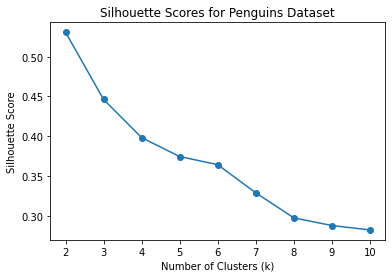

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


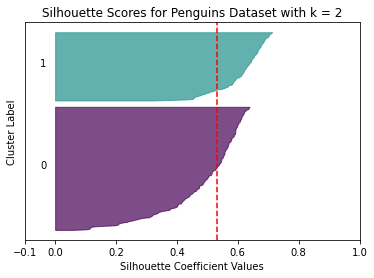

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


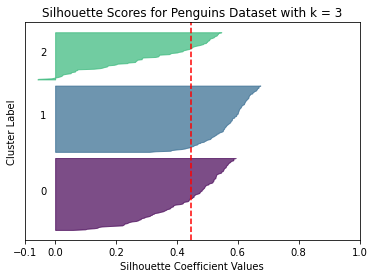

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


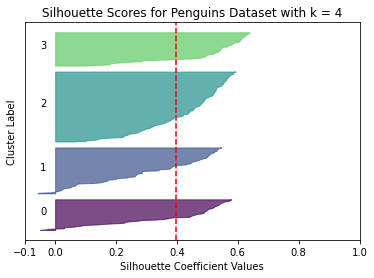

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


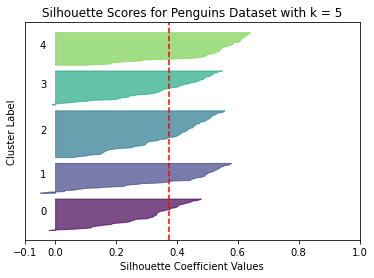

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


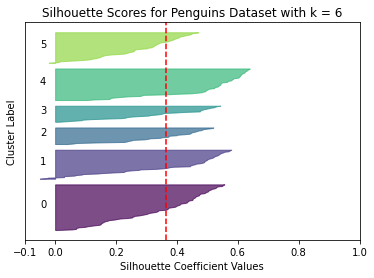

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


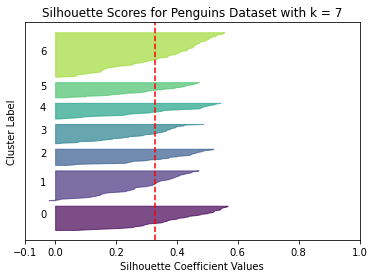

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


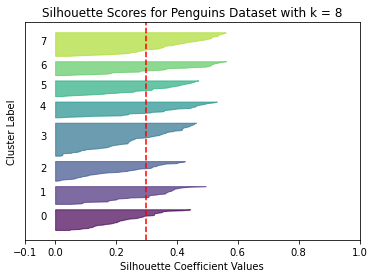

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


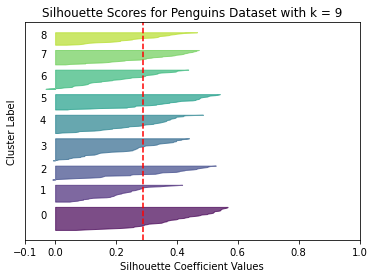

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


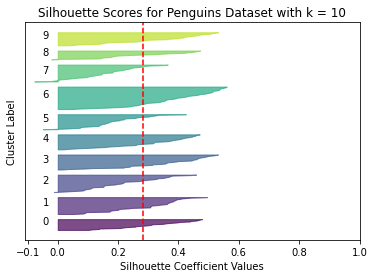

In [ ]:
# This code provides a better visualisation of the knives chart
from sklearn.metrics import silhouette_samples
from matplotlib.cm import get_cmap
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the penguins dataset
penguins = sns.load_dataset("penguins")

# Drop rows with missing values
penguins = penguins.dropna()

# Prepare the features for clustering
features = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
scaled_features = StandardScaler().fit_transform(features)


import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Define a function to calculate k-means clustering and return silhouette score for different k values
def get_silhouette_score(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)
    return score

# Calculate silhouette scores for different k values
k_values = list(range(2, 11))
silhouette_scores = [get_silhouette_score(k, scaled_features) for k in k_values]

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Penguins Dataset")
plt.show()


def plot_silhouette_scores(k, features):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(features)
    labels = kmeans.labels_
    score = silhouette_score(features, labels)

    # Compute silhouette scores for each sample
    sample_scores = silhouette_samples(features, labels)

    fig, ax = plt.subplots()
    y_lower = 10
    cmap = get_cmap("viridis")

    for i in range(k):
        # Aggregate the silhouette scores for samples belonging to the same cluster and sort them
        ith_cluster_silhouette_values = sample_scores[labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cmap(float(i) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.set_title("Silhouette Scores for Penguins Dataset with k = {}".format(k))
    ax.set_xlabel("Silhouette Coefficient Values")
    ax.set_ylabel("Cluster Label")

    # The vertical line for the average silhouette score of all the values
    ax.axvline(x=score, color="red", linestyle="--")

    ax.set_yticks([])  # Clear the y-axis labels
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.show()

# Visualize the silhouette scores for different k values
for k in range(2, 11):
    plot_silhouette_scores(k, scaled_features)

   
